In [329]:
#import libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Style, Fore
import math
from scipy import stats

In [330]:
#import datasets

train_data =pd.read_csv('train.csv', index_col='patient_id')
test_data =pd.read_csv('test.csv', index_col='patient_id')
solution_temp =pd.read_csv('solution_template.csv')

In [331]:
solution_temp.head()

patient_id  metastatic_diagnosis_period
0      730681                          100
1      334212                            0
2      571362                          100
3      907331                          100
4      208382                          100

In [332]:
train_data.head()

patient_race  payer_type patient_state  patient_zip3   Region  \
patient_id                                                                 
268700              NaN  COMMERCIAL            AR           724    South   
484983            White         NaN            IL           629  Midwest   
277055              NaN  COMMERCIAL            CA           925     West   
320055         Hispanic    MEDICAID            CA           900     West   
190386              NaN  COMMERCIAL            CA           934     West   

                      Division  patient_age patient_gender    bmi  \
patient_id                                                          
268700      West South Central           39              F    NaN   
484983      East North Central           55              F  35.36   
277055                 Pacific           59              F    NaN   
320055                 Pacific           59              F    NaN   
190386                 Pacific           71              F    NaN   

           breast_cancer_diagnosis_code  ... Average of Apr-18  \
patient_id                               ...                     
268700                           C50912  ...             52.55   
484983                           C50412  ...             49.30   
277055                             1749  ...             68.50   
320055                           C50911  ...             63.34   
190386                             1748  ...             59.45   

           Average of May-18 Average of Jun-18 Average of Jul-18  \
patient_id                                                         
268700                 74.77             79.96             81.69   
484983                 72.87             77.40             77.43   
277055                 70.31             78.61             87.24   
320055                 63.10             67.45             75.86   
190386                 60.24             64.77             69.81   

            Average of Aug-18  Average of Sep-18  Average of Oct-18  \
patient_id                                                            
268700                  78.30              74.56              59.98   
484983                  75.83              72.64              58.36   
277055                  85.52              80.75              70.81   
320055                  75.24              71.10              68.95   
190386                  70.13              68.10              65.38   

            Average of Nov-18  Average of Dec-18  metastatic_diagnosis_period  
patient_id                                                                     
268700                  42.98              41.18                          191  
484983                  39.68              39.71                           33  
277055                  62.67              55.58                          157  
320055                  65.46              59.46                          146  
190386                  60.72              54.08                          286  

[5 rows x 151 columns]

In [333]:
#Shapes of the train and test datasets

print(train_data.shape)
print(test_data.shape)

(13173, 151)
(5646, 150)


In [412]:
list[train_data.columns]

list[Index(['patient_race', 'payer_type', 'patient_state', 'patient_zip3', 'Region',
       'Division', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code',
       ...
       'Average of May-18', 'Average of Jun-18', 'Average of Jul-18',
       'Average of Aug-18', 'Average of Sep-18', 'Average of Oct-18',
       'Average of Nov-18', 'Average of Dec-18', 'metastatic_diagnosis_period',
       'Age_clasess'],
      dtype='object', length=152)]

In [335]:
desc = pd.DataFrame(index = list(train_data))

desc['type'] = train_data.dtypes
desc['count'] = train_data.count()
desc['nunique'] = train_data.nunique()
desc['%unique'] = desc['nunique']/len(train_data) * 100
desc['null'] = train_data.isnull().sum()
desc['%null'] = train_data.isnull().sum() /len(train_data) * 100

desc = pd.concat([desc,train_data.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(cmap='YlOrBr')\
    .bar(subset=['mean'],color='green')\
    .bar(subset=['max'],color='red')\
    .bar(subset=['min'], color='purple')

desc.head(100)


type  count  nunique   %unique  null      %null  \
patient_race        object   6516        5  0.037956  6657  50.535186   
payer_type          object  11408        3  0.022774  1765  13.398618   
patient_state       object  13173       44  0.334017     0   0.000000   
patient_zip3         int64  13173      751  5.701055     0   0.000000   
Region              object  13173        4  0.030365     0   0.000000   
...                    ...    ...      ...       ...   ...        ...   
Average of Jun-14  float64  13021      632  4.797692   152   1.153875   
Average of Jul-14  float64  13173      603  4.577545     0   0.000000   
Average of Aug-14  float64  13173      616  4.676232     0   0.000000   
Average of Sep-14  float64  13173      621  4.714188     0   0.000000   
Average of Oct-14  float64  13173      642  4.873605     0   0.000000   

                         mean         std     min     25%     50%     75%  \
patient_race              NaN         NaN     NaN     NaN     NaN     NaN   
payer_type                NaN         NaN     NaN     NaN     NaN     NaN   
patient_state             NaN         NaN     NaN     NaN     NaN     NaN   
patient_zip3       568.530859  275.758485  100.00  330.00  557.00  832.00   
Region                    NaN         NaN     NaN     NaN     NaN     NaN   
...                       ...         ...     ...     ...     ...     ...   
Average of Jun-14   72.397563    6.068137   51.61   68.41   71.41   76.28   
Average of Jul-14   74.343185    5.978399   57.60   69.35   73.96   77.66   
Average of Aug-14   74.317533    5.859982   56.56   70.21   73.23   77.52   
Average of Sep-14   69.491319    7.315835   42.48   63.18   67.59   75.98   
Average of Oct-14   60.632386    9.001259   34.80   52.64   58.05   69.71   

                      max  
patient_race          NaN  
payer_type            NaN  
patient_state         NaN  
patient_zip3       995.00  
Region                NaN  
...                   ...  
Average of Jun-14   90.22  
Average of Jul-14   95.53  
Average of Aug-14   90.17  
Average of Sep-14   87.83  
Average of Oct-14   82.10  

[100 rows x 13 columns]

In [336]:
# Filter numeric columns
numeric_columns = train_data.select_dtypes(include=['number'])
numeric_columns

patient_zip3  patient_age    bmi  population  density  age_median  \
patient_id                                                                      
268700               724           39    NaN     3924.87    82.63       42.58   
484983               629           55  35.36     2745.39    51.79       43.54   
277055               925           59    NaN    38343.18   700.34       36.28   
320055               900           59    NaN    36054.12  5294.33       36.65   
190386               934           71    NaN    13700.37   400.48       41.78   
...                  ...          ...    ...         ...      ...         ...   
588544               191           59    NaN    31948.46  5512.17       35.72   
393047               757           73  30.67     9309.38   204.69       40.87   
790904               928           19    NaN    39121.88  2295.94       38.20   
455518               481           52    NaN    23266.06   743.56       41.47   
379418               900           63    NaN    36054.12  5294.33       36.65   

            age_under_10  age_10_to_19  age_20s  age_30s  ...  \
patient_id                                                ...   
268700             11.61         13.03    10.87    11.80  ...   
484983             11.22         12.19    11.45    11.01  ...   
277055             13.27         15.66    13.49    13.45  ...   
320055              9.76         11.27    17.23    17.44  ...   
190386             10.03         16.43    12.97    11.29  ...   
...                  ...           ...      ...      ...  ...   
588544             10.85         10.95    18.16    17.35  ...   
393047             11.27         14.64    12.11    10.93  ...   
790904             11.88         13.35    14.23    13.42  ...   
455518             10.94         13.59    12.67    11.61  ...   
379418              9.76         11.27    17.23    17.44  ...   

            Average of Apr-18  Average of May-18  Average of Jun-18  \
patient_id                                                            
268700                  52.55              74.77              79.96   
484983                  49.30              72.87              77.40   
277055                  68.50              70.31              78.61   
320055                  63.34              63.10              67.45   
190386                  59.45              60.24              64.77   
...                       ...                ...                ...   
588544                  48.81              66.12              70.38   
393047                  62.03              77.82              84.52   
790904                  66.20              66.04              70.87   
455518                  39.93              63.56              68.68   
379418                  63.34              63.10              67.45   

            Average of Jul-18  Average of Aug-18  Average of Sep-18  \
patient_id                                                            
268700                  81.69              78.30              74.56   
484983                  77.43              75.83              72.64   
277055                  87.24              85.52              80.75   
320055                  75.86              75.24              71.10   
190386                  69.81              70.13              68.10   
...                       ...                ...                ...   
588544                  77.18              77.53              70.90   
393047                  85.35              84.61              78.50   
790904                  80.68              79.75              75.27   
455518                  72.13              72.55              66.17   
379418                  75.86              75.24              71.10   

            Average of Oct-18  Average of Nov-18  Average of Dec-18  \
patient_id                                                            
268700                  59.98              42.98              41.18   
484983                  58.36              39.68   

In [308]:
# Filter categorical columns
categorical_columns = train_data.select_dtypes(exclude=['number'])
categorical_columns

patient_race  payer_type patient_state     Region  \
patient_id                                                     
268700              NaN  COMMERCIAL            AR      South   
484983            White         NaN            IL    Midwest   
277055              NaN  COMMERCIAL            CA       West   
320055         Hispanic    MEDICAID            CA       West   
190386              NaN  COMMERCIAL            CA       West   
...                 ...         ...           ...        ...   
588544         Hispanic    MEDICAID            PA  Northeast   
393047              NaN  COMMERCIAL            TX      South   
790904              NaN  COMMERCIAL            CA       West   
455518              NaN  COMMERCIAL            MI    Midwest   
379418         Hispanic    MEDICAID            CA       West   

                      Division patient_gender breast_cancer_diagnosis_code  \
patient_id                                                                   
268700      West South Central              F                       C50912   
484983      East North Central              F                       C50412   
277055                 Pacific              F                         1749   
320055                 Pacific              F                       C50911   
190386                 Pacific              F                         1748   
...                        ...            ...                          ...   
588544         Middle Atlantic              F                       C50911   
393047      West South Central              F                         1749   
790904                 Pacific              F                       C50819   
455518      East North Central              F                         1742   
379418                 Pacific              F                       C50911   

                                 breast_cancer_diagnosis_desc  \
patient_id                                                      
268700      Malignant neoplasm of unspecified site of left...   
484983      Malig neoplasm of upper-outer quadrant of left...   
277055      Malignant neoplasm of breast (female), unspeci...   
320055      Malignant neoplasm of unsp site of right femal...   
190386      Malignant neoplasm of other specified sites of...   
...                                                       ...   
588544      Malignant neoplasm of unsp site of right femal...   
393047      Malignant neoplasm of breast (female), unspeci...   
790904      Malignant neoplasm of ovrlp sites of unsp fema...   
455518      Malignant neoplasm of upper-inner quadrant of ...   
379418      Malignant neoplasm of unsp site of right femal...   

           metastatic_cancer_diagnosis_code metastatic_first_novel_treatment  \
patient_id                                                                     
268700                                 C773                              NaN   
484983                                 C773                              NaN   
277055                                 C773                              NaN   
320055                                 C773                              NaN   
190386                                C7951                              NaN   
...                                     ...                              ...   
588544                                 C773                              NaN   
393047                                C7951                              NaN   
790904                                 C799                              NaN   
455518                                 C779                              NaN   
379418                                 C787                              NaN   

           metastatic_first_novel_treatment_type  
patient_id                                        
268700                                       NaN  
484983                                       NaN  
277055                                       NaN  
320055               

In [309]:
for i in train_data.columns:
    print(f'{i}:',train_data[i].unique(),'\nLength:', len(train_data[i].unique()) ,'\n')

patient_race: [nan 'White' 'Hispanic' 'Black' 'Other' 'Asian'] 
Length: 6 

payer_type: ['COMMERCIAL' nan 'MEDICAID' 'MEDICARE ADVANTAGE'] 
Length: 4 

patient_state: ['AR' 'IL' 'CA' 'IN' 'OH' 'DE' 'LA' 'PA' 'MN' 'MI' 'NY' 'FL' 'CO' 'KY'
 'GA' 'TX' 'VA' 'NC' 'HI' 'NM' 'NV' 'MD' 'TN' 'MO' 'SC' 'AZ' 'UT' 'WA'
 'NE' 'OR' 'IA' 'ID' 'WI' 'OK' 'AL' 'MT' 'SD' 'KS' 'AK' 'WY' 'MS' 'DC'
 'WV' 'ND'] 
Length: 44 

patient_zip3: [724 629 925 900 934 461 448 198 706 922 191 453 553 481 104 485 347 809
 421 300 564 484 400 770 305 241 112 329 282 441 968 303 467 109 492 957
 926 870 124 483 890 431 273 920 341 620 218 113 460 601 766 475 927 902
 782 331 802 611 245 100 613 625 907 125 398 402 482 608 488 110 374 906
 114 800 471 427 773 339 912 761 936 640 477 785 120 606 463 600 442 750
 412 297 787 652 757 238 610 775 456 764 857 852 316 778 618 928 551 913
 322 847 494 464 230 121 622 760 190 189 604 931 705 336 405 450 315 452
 981 335 334 281 122 717 330 960 944 786 685 648 240 983 958 476 974 

race_black: [ 1.73  6.44  6.41 12.22  3.29  1.27  1.13 25.15 11.8   3.65 37.72  2.41
  2.42  7.24 32.52 33.78 11.19  6.94  2.21 32.51  0.46  1.37  3.37 22.5
  4.21  7.47 28.83 11.28 31.27 33.7   5.06 39.07  0.36  8.37  1.54  1.44
  1.41  1.87  8.21  6.86  3.28 17.03  2.15  6.12  4.87 16.44  4.54  2.93
  8.28  7.48  0.97  7.33  8.2  15.27  6.6  16.22 20.94 13.83  0.41  2.95
  8.91  5.72 41.73 23.05 63.82 34.8   2.54  9.26 32.7   2.17 37.74  7.44
  1.17  2.29  7.69  1.55 16.27  2.71  4.03 10.21  0.42  1.96 28.46  5.94
  3.79  2.01 11.25 20.56  6.98  3.98 12.99 37.1   1.92 10.79  1.74  1.06
  4.92  3.57 23.09 15.19  3.62  2.53  9.92  4.18 27.79  0.21  3.04 63.56
 17.95  1.45 11.06  9.23 13.04  1.72 22.47  1.66 26.7  17.6  13.55  3.19
 15.95 28.33  7.73 10.8  18.55 15.77 32.79 18.48  1.04  2.03  3.49  2.78
  0.82 10.56  1.62 10.82  0.86  0.39 15.89 17.93  0.65 17.18  3.72 11.3
 53.44 16.11  0.33 20.    2.    4.02 23.76  1.24 24.04 10.57 16.93  5.09
  4.48  0.43 14.27  0.62  6.53  2.97 26.4

Average of Jun-15: [77.69 75.41 80.43 69.66 65.61 71.36 68.95 72.48 80.44 86.6  71.3  69.18
 67.51 66.07 69.54 64.93 82.69 64.53 75.55 77.72 63.64 63.66 74.81 81.3
 75.58 73.04 69.82 81.04 79.35 66.52 76.86 68.43 66.75 66.5  72.63 70.74
 69.93 63.91 85.08 70.69 77.24 71.14 83.52 72.85 75.38 69.84 70.8  67.79
 80.86 74.2  72.01 69.9  80.71 82.86 70.37 65.4  74.54 69.8  69.97 72.3
 71.29 63.87 79.87 75.01 65.8  69.48 64.96 76.02 71.59 69.76 75.92 73.39
 80.64 82.48 71.19 82.47 78.4  74.77 75.28 82.44 62.9  70.04 68.32 66.04
 68.63 81.24 72.75 79.56 78.82 74.14 80.65 77.29 67.15 81.73 72.17 79.06
 81.87 89.48 80.09 79.83 71.58 73.27 67.73 71.25 81.25 64.25 67.75 75.71
 62.89 75.05 82.38 71.51 69.29 68.73 65.57 80.31 81.85 72.99 70.06 79.96
 72.73 63.41 82.12 78.78 62.92 79.64 82.49 66.48 68.03 79.9  71.56 76.
 73.31 64.5  75.03 75.51 65.04 80.74 76.1  70.63 78.58 77.92 70.28 75.16
 80.05 77.63 71.42 65.79 70.7  81.42 66.29 69.04 75.46 79.86 70.08 72.44
 67.98 67.33 90.9  69.11 71.7  80.99

Average of Jun-18: [79.96 77.4  78.61 67.45 64.77 74.27 71.26 70.63 81.8  83.59 70.38 72.79
 69.51 68.68 69.41 64.49 81.92 67.43 77.19 77.56 66.   65.37 76.53 84.57
 75.26 72.44 70.35 81.3  79.46 67.95 77.14 77.77 71.75 66.8  68.52 69.98
 67.87 71.69 64.45 66.66 84.44 72.84 77.26 69.28 83.86 76.32 75.46 70.33
 73.59 70.8  83.48 76.1  69.17 67.67 85.59 82.7  74.5  66.49 74.29 70.23
 73.13 75.37 69.15 64.59   nan 77.11 67.98 72.05 67.64 74.47 69.37 72.59
 77.17 75.74 84.05 83.   68.7  84.28 74.88 77.35 77.64 85.25 63.6  72.42
 71.29 68.6  68.49 82.72 73.03 78.86 84.11 78.01 84.52 76.64 70.03 84.22
 74.54 83.95 81.48 88.29 80.71 82.74 74.43 70.87 71.39 69.54 80.9  69.99
 67.27 70.95 63.55 76.84 84.24 70.34 68.55 71.78 65.3  81.54 82.16 74.79
 80.41 75.16 57.77 82.34 81.23 78.42 63.54 80.84 82.28 67.84 66.77 84.4
 75.5  78.8  59.39 72.68 77.52 61.21 83.29 75.71 68.1  78.34 75.11 74.42
 67.29 82.46 77.41 68.61 68.05 79.89 64.18 68.18 82.57 65.29 72.93 74.85
 83.89 71.31 68.81 67.58 64.97 71

In [310]:
for i in test_data.columns:
    print(f'{i}:', test_data[i].unique(),'\nLength:', len(test_data[i].unique()) ,'\n')

patient_race: [nan 'Black' 'Asian' 'White' 'Hispanic' 'Other'] 
Length: 6 

payer_type: ['COMMERCIAL' nan 'MEDICARE ADVANTAGE' 'MEDICAID'] 
Length: 4 

patient_state: ['LA' 'NC' 'TX' 'TN' 'WA' 'CA' 'MI' 'FL' 'PA' 'DE' 'OH' 'MT' 'ID' 'MN'
 'IN' 'NY' 'IL' 'GA' 'CO' 'OK' 'AZ' 'KY' 'NM' 'KS' 'MS' 'VA' 'WI' 'SC'
 'MD' 'IA' 'MO' 'WV' 'AR' 'UT' 'NV' 'DC' 'OR' 'AL' 'HI' 'NE' 'WY' 'SD'
 'ND' 'AK'] 
Length: 44 

patient_zip3: [713 283 794 373 980 914 483 336 917 160 774 199 442 591 440 836 554 761
 469 120 714 611 922 327 925 307 451 801 114 126 435 322 495 112 600 740
 601 852 421 604 162 750 873 939 123 331 606 454 330 347 871 402 605 902
 675 900 921 857 559 565 386 335 306 183 232 284 338 142 191 981 452 610
 532 551 460 280 804 180 481 874 549 303 494 370 328 100 480 614 445 920
 913 937 530 786 436 941 291 607 443 911 304 104 782 294 908 853 766 312
 560 212 731 473 229 752 930 907 504 629 730 446 760 850 631 110 707 398
 775 383 923 531 609 189 334 710 234 242 441 289 241 300 117 906 265 

education_college_or_above: [14.94 18.88 27.74 19.02 49.65 43.23 44.81 38.29 30.6  25.35 26.   25.5
 29.25 36.33 26.24 19.66 50.35 28.25 15.79 30.85 14.5  20.5  18.97 29.99
 22.32 16.07 17.51 47.49 29.72 26.5  19.94 30.34 36.71 41.03 46.46 20.42
 35.82 43.97 18.33 26.73 14.85 44.18 11.28 30.46 30.9  38.62 47.16 32.21
 30.21 24.73 35.03 35.13 40.66 45.45 20.16 37.58 44.23 32.83 25.85 20.97
 15.91 27.84 24.68 31.63 45.46 23.63 15.78 36.78 38.26 56.65 39.22 21.56
 32.6  48.58 29.78 22.09 40.01 31.45 34.02 14.39 21.19 56.32 27.17 24.83
 38.23 66.41 30.73 19.8  23.35 38.72 40.89 20.88 29.58 29.2  22.77 60.66
 18.54 37.98 25.52 64.1  16.79 22.9  32.92 35.07 21.63 17.21 23.94 34.01
 30.84 16.62 41.78 38.24 29.65 34.82 18.92 18.49 22.93 15.47 29.79 33.36
 41.37 50.54 17.98 14.71 21.04 15.18 23.14 32.75 16.33 51.02 37.08 13.32
 28.05 11.93 32.17 24.98 20.34 40.98 45.01 18.1  21.72 18.65 15.77 45.33
 19.49 39.18 15.92 17.69 21.78 22.15 60.83 25.68 36.4  23.15 23.99 19.05
 35.98 15.88 35.56 18.63

race_white: [66.51 54.08 70.36 90.62 64.61 55.78 79.54 62.65 38.71 96.41 62.28 77.96
 93.12 88.33 90.19 86.71 67.92 58.29 93.73 91.08 77.74 70.65 61.37 77.59
 53.95 90.51 96.06 85.58 20.   64.27 91.71 59.15 71.33 44.1  76.87 74.49
 69.41 75.32 94.12 65.39 96.81 61.69 14.5  55.62 67.91 59.1  47.63 68.01
 61.12 69.52 65.66 68.1  79.14 55.02 92.55 42.82 60.27 68.44 93.51 87.24
 72.62 70.33 81.72 53.43 69.96 71.98 62.03 44.02 61.51 63.1  93.41 53.25
 70.78 90.77 75.76 92.37 89.99 83.3  41.3  92.5  44.94 89.27 88.45 59.16
 54.97 81.65 94.45 55.8  71.01 58.64 50.29 92.38 80.79 62.18 44.64 51.28
 71.1  62.72 45.3  62.17 24.15 63.85 61.39 53.81 72.71 82.1  42.81 93.98
 45.99 94.18 82.91 70.94 46.61 95.69 88.75 77.7  96.84 75.82 66.94 52.14
 60.92 65.29 51.44 72.48 86.53 67.63 90.91 90.31 90.92 67.39 65.57 66.31
 96.03 56.21 90.42 86.92 49.02 79.48 40.89 94.5  94.32 69.76 66.69 79.62
 91.27 83.54 64.16 94.25 55.4  67.36 57.69 87.32 42.19 71.84 93.87 85.63
 54.03 86.32 77.43 67.98 73.67 59.25 85

Average of Apr-14: [64.82 61.77 61.53 58.55 48.02 63.85 44.62 72.12 66.22 49.6  68.68 53.03
 48.45 46.36 46.88 43.54 40.8  65.47 49.89 43.74 64.21 45.24 70.68 71.17
 68.01 58.51 54.04 47.55   nan 43.31 48.89 70.25 45.09 51.46 46.43 58.2
 47.04 71.02 58.97 49.09 63.98 47.61 59.12 44.57 76.21 49.92 52.2  75.84
 71.61 55.35 58.75 47.93 64.47 53.8  64.37 63.67 63.69 42.38 37.71 60.59
 71.99 60.05 48.1  57.16 63.63 73.84 45.67 52.32 47.87 54.12 46.55 43.07
 40.53 52.36 59.39 48.76 46.91 48.87 41.6  60.9  44.29 58.45 71.82 49.99
 44.76 49.55 63.11 63.91 64.79 42.09 66.71 49.48 58.83 61.97 50.01 48.07
 64.42 62.83 69.48 65.04 65.35 71.93 64.52 63.81 42.84 60.04 52.02 54.95
 64.16 61.22 65.38 43.97 56.85 59.64 49.46 65.42 73.01 55.99 66.9  62.56
 68.58 59.51 58.39 43.96 50.13 50.47 73.86 63.29 56.47 55.26 46.94 57.77
 60.6  47.27 65.58 53.65 55.81 67.4  51.88 52.9  44.81 45.8  43.85 59.62
 62.54 52.63 54.07 65.64 55.28 62.36 66.68 57.45 50.21 56.61 46.4  63.16
 62.76 58.92 64.99 50.26 42.99 49

Average of Sep-18: [80.2  78.85 72.16 74.87 57.52 71.05 63.73 83.38 75.22 68.84 79.09 74.75
 67.48 57.66 67.13 60.75 63.74 76.23 68.26 63.97 80.11 62.44 85.1  83.3
 80.75 76.32 71.5  66.79 69.93 62.4  67.84 82.26 65.13 69.92 66.02 73.28
 66.85 87.53 74.15 68.87 68.37 76.25 65.22 63.46 63.68 83.21 69.89 70.71
 82.73 83.34 70.88 73.29 67.92 71.31 70.58 71.1  80.5  64.33 57.21 76.38
 83.8  77.34 66.12 73.88 78.65 82.95 65.08 70.9  72.08 65.15 65.65 64.
 69.32 77.6  56.42 66.77 66.17 67.81 62.81 79.16 64.97 75.19 83.81 69.82
 65.18 68.23 67.03 72.03 72.64 74.89 63.33 78.24 68.44 63.98 79.1  69.96
 67.6  71.01 80.64 68.91 79.74 80.52 72.7  87.7  77.18 81.28 64.19 73.11
 73.74 69.83 71.37 76.45 69.06 72.84 64.58 73.37 68.54 76.21 88.68 72.14
 81.1  79.6  80.51 75.43 72.55 64.47 69.62 67.71 78.95 76.88 67.02 74.82
 71.61 78.71 68.16 73.15 70.18 72.49 77.08 80.15 71.82 70.97 63.85   nan
 64.52 77.98 70.75 71.08 80.05 73.34 77.62 75.27 73.93 70.52 74.74 66.31
 80.93 75.2  74.53 75.25 69.39 54.9

In [337]:
test_data.columns

Index(['patient_race', 'payer_type', 'patient_state', 'patient_zip3', 'Region',
       'Division', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code',
       ...
       'Average of Mar-18', 'Average of Apr-18', 'Average of May-18',
       'Average of Jun-18', 'Average of Jul-18', 'Average of Aug-18',
       'Average of Sep-18', 'Average of Oct-18', 'Average of Nov-18',
       'Average of Dec-18'],
      dtype='object', length=150)

In [338]:
train_data.describe()

patient_zip3   patient_age          bmi    population       density  \
count  13173.000000  13173.000000  4102.000000  13173.000000  13173.000000   
mean     568.530859     59.271313    29.168808  20651.373928   1776.872376   
std      275.758485     13.218883     5.752820  13840.379638   3876.061897   
min      100.000000     18.000000    15.000000    635.550000      0.920000   
25%      330.000000     50.000000    24.825000   9160.340000    163.150000   
50%      557.000000     59.000000    28.580000  18952.780000    700.340000   
75%      832.000000     67.000000    33.000000  30021.280000   1666.520000   
max      995.000000     91.000000    97.000000  71374.130000  29851.690000   

         age_median  age_under_10  age_10_to_19       age_20s       age_30s  \
count  13173.000000  13173.000000  13173.000000  13173.000000  13173.000000   
mean      40.542676     11.104988     12.857587     13.297375     12.893557   
std        4.031027      1.511534      1.952248      3.390472      2.410845   
min       20.600000      0.000000      6.310000      5.930000      1.500000   
25%       37.190000     10.150000     11.650000     11.000000     11.270000   
50%       40.640000     11.000000     12.900000     12.530000     12.400000   
75%       42.940000     12.140000     13.910000     14.970000     14.130000   
max       54.570000     17.680000     35.300000     62.100000     25.470000   

       ...  Average of Apr-18  Average of May-18  Average of Jun-18  \
count  ...       13173.000000       13173.000000       13164.000000   
mean   ...          52.411982          67.932236          73.074635   
std    ...          11.069900           6.301740           6.581630   
min    ...          28.790000          45.880000          53.460000   
25%    ...          42.900000          63.220000          68.050000   
50%    ...          50.290000          66.120000          71.640000   
75%    ...          62.220000          72.590000          77.660000   
max    ...          76.490000          86.570000          90.660000   

       Average of Jul-18  Average of Aug-18  Average of Sep-18  \
count       13127.000000       13157.000000       13166.000000   
mean           77.120929          76.281156          71.417027   
std             5.335091           5.282156           6.502875   
min            58.540000          56.200000          51.830000   
25%            73.170000          72.550000          67.020000   
50%            76.650000          76.080000          70.880000   
75%            80.290000          79.130000          75.640000   
max            96.430000          95.770000          89.190000   

       Average of Oct-18  Average of Nov-18  Average of Dec-18  \
count       13166.000000       13161.000000       13140.000000   
mean           59.323286          46.100150          42.096213   
std             9.261934          12.245594          11.209011   
min            37.540000          19.150000          15.380000   
25%            51.970000          35.560000          33.370000   
50%            57.450000          42.430000          38.500000   
75%            67.360000          55.730000          50.500000   
max            81.460000          76.300000          73.540000   

       metastatic_diagnosis_period  
count                 13173.000000  
mean                     96.515221  
std                     108.969873  
min                       0.000000  
25%                       3.000000  
50%                      44.000000  
75%                     181.000000  
max                     365.000000  

[8 rows x 140 columns]

### Check for null values

In [339]:
train_data.isnull().values.any()

True

In [340]:
test_data.isnull().values.any()

True

In [341]:
train_data.isnull().sum()

patient_race                   6657
payer_type                     1765
patient_state                     0
patient_zip3                      0
Region                            0
                               ... 
Average of Sep-18                 7
Average of Oct-18                 7
Average of Nov-18                12
Average of Dec-18                33
metastatic_diagnosis_period       0
Length: 151, dtype: int64

In [342]:
test_data.isnull().sum()

patient_race         2785
payer_type            785
patient_state           0
patient_zip3            0
Region                  0
                     ... 
Average of Aug-18       7
Average of Sep-18       2
Average of Oct-18       2
Average of Nov-18       8
Average of Dec-18      23
Length: 150, dtype: int64

In [343]:
import pandas as pd

# Assuming train_data and test_data are your dataframes
for column in train_data.columns:
    train_unique = set(train_data[column].unique())
    test_unique = set(test_data[column].unique())
    
    train_unique_only = train_unique - test_unique
    test_unique_only = test_unique - train_unique
    
    print(f'Column: {column}')
    print(f'Unique values only in train data: {train_unique_only}')
    print(f'Unique values only in test data: {test_unique_only}')
    print()


Column: patient_race
Unique values only in train data: set()
Unique values only in test data: set()

Column: payer_type
Unique values only in train data: set()
Unique values only in test data: set()

Column: patient_state
Unique values only in train data: set()
Unique values only in test data: set()

Column: patient_zip3
Unique values only in train data: {512, 514, 516, 521, 523, 538, 540, 558, 567, 571, 572, 575, 577, 580, 585, 590, 623, 129, 644, 648, 138, 139, 651, 652, 654, 664, 155, 668, 158, 671, 673, 164, 165, 677, 167, 678, 169, 684, 686, 691, 716, 209, 724, 725, 216, 219, 222, 223, 734, 739, 746, 749, 247, 248, 251, 252, 256, 772, 263, 264, 266, 276, 277, 788, 279, 795, 288, 292, 807, 297, 824, 827, 828, 829, 326, 844, 845, 855, 859, 860, 355, 356, 358, 877, 366, 367, 897, 388, 397, 412, 414, 424, 995, 508}
Unique values only in test data: {260, 997, 646, 520, 874, 747, 268, 689, 214, 250, 573, 351}

Column: Region
Unique values only in train data: set()
Unique values only in 

KeyError: 'metastatic_diagnosis_period'

# EDA

Write here what do you notice about the data:

1) Which features have a lot of null values?

2) What is the datatypes of the features? Do you have categorical, numerical data, or both?

3) What data type is our target value?

4) If you have categorical data how many unique numbers do you see?

5) Which features do you think can be important when trying to predict 'metastatic_diagnosis_period'?

In [344]:
TARGET = 'metastatic_diagnosis_period'
NUMERIC_COLS = [f for f in train_data._get_numeric_data().columns if f!= TARGET]
CAT_COLS     = list(test_data.drop(NUMERIC_COLS, axis = 1))

In [420]:
type(TARGET)

str

In [346]:
print(NUMERIC_COLS)
print('Length of numeric columns :', len(NUMERIC_COLS))

['patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above', 'education_stem_degree', 'labor_force_participation', 'unemploym

In [347]:
# print null values of numerical columns

In [348]:
null_values = train_data[NUMERIC_COLS].isnull().sum()

for i, col in enumerate(null_values):
    print(f'{NUMERIC_COLS[i]}: {col}')

patient_zip3: 0
patient_age: 0
bmi: 9071
population: 0
density: 0
age_median: 0
age_under_10: 0
age_10_to_19: 0
age_20s: 0
age_30s: 0
age_40s: 0
age_50s: 0
age_60s: 0
age_70s: 0
age_over_80: 0
male: 0
female: 0
married: 0
divorced: 0
never_married: 0
widowed: 0
family_size: 5
family_dual_income: 5
income_household_median: 5
income_household_under_5: 5
income_household_5_to_10: 5
income_household_10_to_15: 5
income_household_15_to_20: 5
income_household_20_to_25: 5
income_household_25_to_35: 5
income_household_35_to_50: 5
income_household_50_to_75: 5
income_household_75_to_100: 5
income_household_100_to_150: 5
income_household_150_over: 5
income_household_six_figure: 5
income_individual_median: 0
home_ownership: 5
housing_units: 0
home_value: 5
rent_median: 5
rent_burden: 5
education_less_highschool: 0
education_highschool: 0
education_some_college: 0
education_bachelors: 0
education_graduate: 0
education_college_or_above: 0
education_stem_degree: 0
labor_force_participation: 0
unemploy

In [349]:
#print percentages of null values

In [350]:
null_values = train_data[NUMERIC_COLS].isnull().sum()
total_rows = len(train_data)

for i, col in enumerate(null_values):
    percentage_null = (col / total_rows) * 100
    print(f'{NUMERIC_COLS[i]}: {percentage_null:.2f}%')


patient_zip3: 0.00%
patient_age: 0.00%
bmi: 68.86%
population: 0.00%
density: 0.00%
age_median: 0.00%
age_under_10: 0.00%
age_10_to_19: 0.00%
age_20s: 0.00%
age_30s: 0.00%
age_40s: 0.00%
age_50s: 0.00%
age_60s: 0.00%
age_70s: 0.00%
age_over_80: 0.00%
male: 0.00%
female: 0.00%
married: 0.00%
divorced: 0.00%
never_married: 0.00%
widowed: 0.00%
family_size: 0.04%
family_dual_income: 0.04%
income_household_median: 0.04%
income_household_under_5: 0.04%
income_household_5_to_10: 0.04%
income_household_10_to_15: 0.04%
income_household_15_to_20: 0.04%
income_household_20_to_25: 0.04%
income_household_25_to_35: 0.04%
income_household_35_to_50: 0.04%
income_household_50_to_75: 0.04%
income_household_75_to_100: 0.04%
income_household_100_to_150: 0.04%
income_household_150_over: 0.04%
income_household_six_figure: 0.04%
income_individual_median: 0.00%
home_ownership: 0.04%
housing_units: 0.00%
home_value: 0.04%
rent_median: 0.04%
rent_burden: 0.04%
education_less_highschool: 0.00%
education_highsch

### number of null values count of bmi : 9071 
### percentage null value of bmi: 68.86%

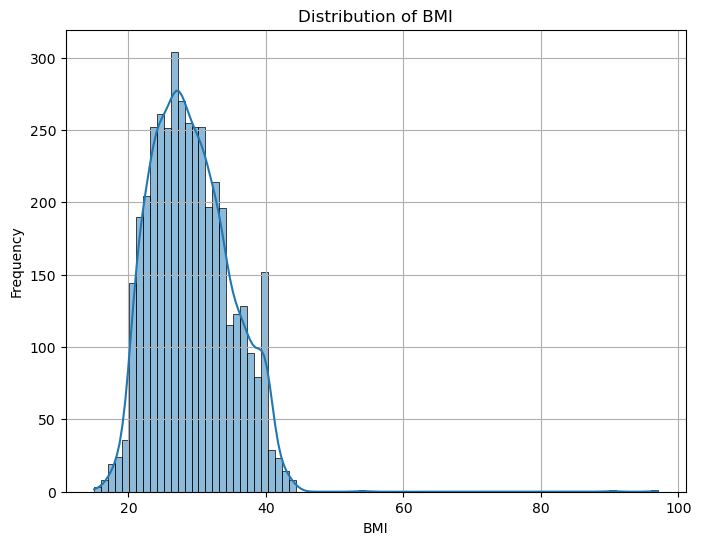

In [351]:
# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(train_data['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [352]:
bmi_mean = train_data['bmi'].mean()
bmi_mode = train_data['bmi'].mode()
bmi_median =train_data['bmi'].median()
print(bmi_mean)
print(bmi_mode)
print(bmi_median)

29.16880789858606
0    40.0
Name: bmi, dtype: float64
28.58


In [355]:
# not normally distributed
# mean and median approximately equal

In [362]:
train_data.head(1)

patient_race  payer_type patient_state  patient_zip3 Region  \
patient_id                                                               
268700              NaN  COMMERCIAL            AR           724  South   

                      Division  patient_age patient_gender  bmi  \
patient_id                                                        
268700      West South Central           39              F  NaN   

           breast_cancer_diagnosis_code  ... Average of Apr-18  \
patient_id                               ...                     
268700                           C50912  ...             52.55   

           Average of May-18 Average of Jun-18 Average of Jul-18  \
patient_id                                                         
268700                 74.77             79.96             81.69   

            Average of Aug-18  Average of Sep-18  Average of Oct-18  \
patient_id                                                            
268700                   78.3              74.56              59.98   

            Average of Nov-18  Average of Dec-18  metastatic_diagnosis_period  
patient_id                                                                     
268700                  42.98              41.18                          191  

[1 rows x 151 columns]

In [383]:
unique_age = train_data['patient_age'].unique()
print(unique_age)
print('length of unique_age: ' , len(unique_age))

[39 55 59 71 63 57 56 65 60 73 47 64 51 74 58 69 77 67 78 61 75 49 37 35
 48 76 84 32 83 62 91 68 72 45 54 27 44 52 43 66 50 53 42 33 46 82 34 24
 70 36 90 41 40 38 79 29 20 30 26 31 21 25 22 18 28 23 19]
length of unique_age:  67


In [397]:
print(train_data['patient_age'].max())
print(train_data['patient_age'].min())

91
18


In [413]:
train_data['Age_clasess']= pd.cut(train_data['patient_age'],bins=np.arange(10,100,10))
train_data.head(1)

patient_race  payer_type patient_state  patient_zip3 Region  \
patient_id                                                               
268700              NaN  COMMERCIAL            AR           724  South   

                      Division  patient_age patient_gender  bmi  \
patient_id                                                        
268700      West South Central           39              F  NaN   

           breast_cancer_diagnosis_code  ... Average of May-18  \
patient_id                               ...                     
268700                           C50912  ...             74.77   

           Average of Jun-18 Average of Jul-18 Average of Aug-18  \
patient_id                                                         
268700                 79.96             81.69              78.3   

            Average of Sep-18  Average of Oct-18  Average of Nov-18  \
patient_id                                                            
268700                  74.56              59.98              42.98   

            Average of Dec-18  metastatic_diagnosis_period  Age_clasess  
patient_id                                                               
268700                  41.18                          191     (30, 40]  

[1 rows x 152 columns]

In [406]:
train_data['Age_clasess'].unique()

[(30.0, 40.0], (50.0, 60.0], (70.0, 80.0], (60.0, 70.0], (40.0, 50.0], (80.0, 90.0], NaN, (20.0, 30.0], (10.0, 20.0]]
Categories (8, interval[int64, right]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]

Age_clasess
(10, 20]    35.586250
(20, 30]    28.181944
(30, 40]    28.912374
(40, 50]    29.038254
(50, 60]    29.779823
(60, 70]    29.351385
(70, 80]    28.825067
(80, 90]    26.616642
Name: bmi, dtype: float64

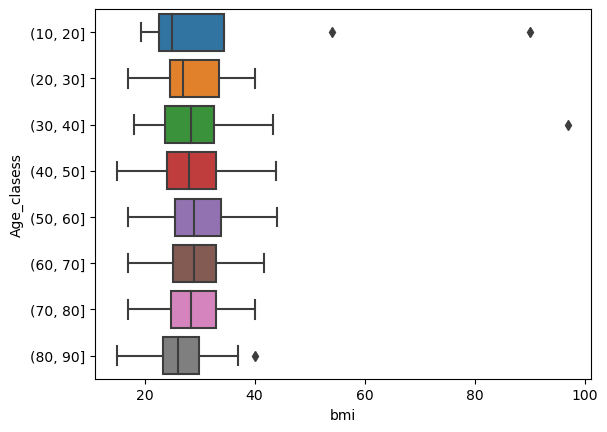

In [414]:
sns.boxplot(data = train_data, x='bmi', y='Age_clasess')
train_data.groupby('Age_clasess')['bmi'].mean()

patient_race
Asian       25.918296
Black       30.836006
Hispanic    30.526573
Other       27.812079
White       29.237210
Name: bmi, dtype: float64

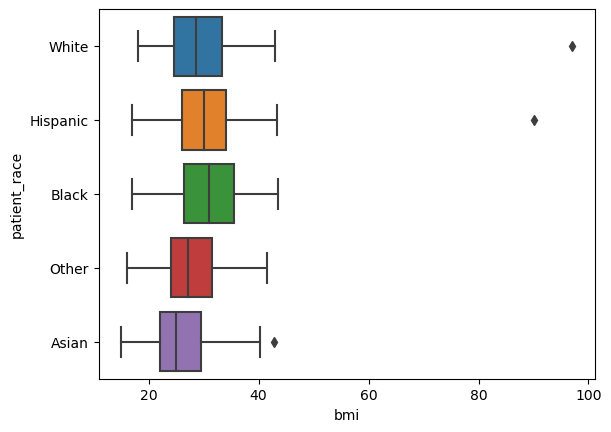

In [388]:
# boxplot of the bmi column of the train data set

sns.boxplot(data = train_data, x='bmi', y='patient_race')
train_data.groupby('patient_race')['bmi'].mean()

Region
Midwest      29.530191
Northeast    28.908723
South        29.728083
West         28.358006
Name: bmi, dtype: float64

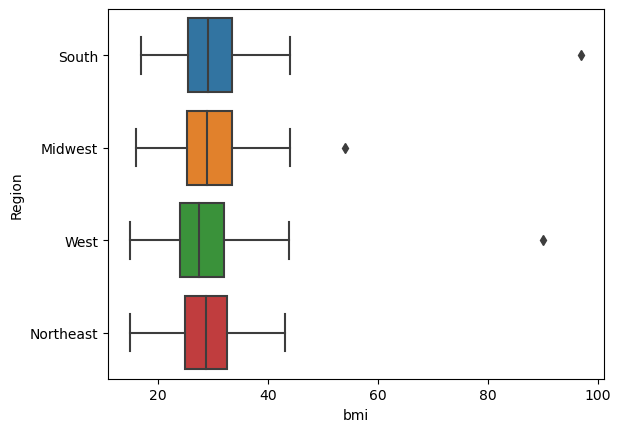

In [389]:
sns.boxplot(data = train_data, x='bmi', y='Region')
train_data.groupby('Region')['bmi'].mean()

Division
East North Central    29.652392
East South Central    30.318235
Middle Atlantic       28.908723
Mountain              28.208474
Pacific               28.407476
South Atlantic        29.598278
West North Central    28.975678
West South Central    29.619640
Name: bmi, dtype: float64

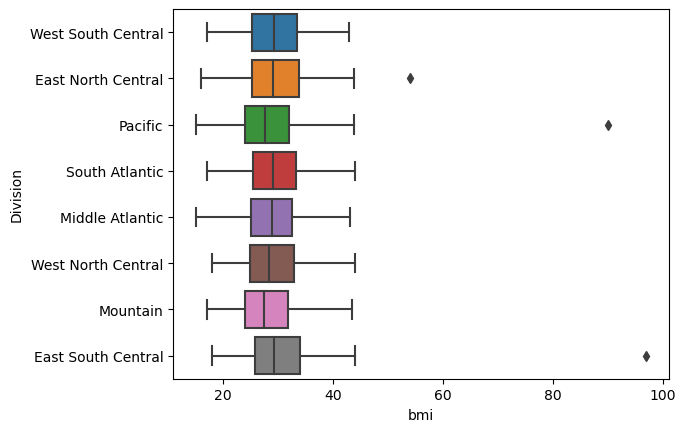

In [390]:
sns.boxplot(data = train_data, x='bmi', y='Division')
train_data.groupby('Division')['bmi'].mean()

<Axes: xlabel='patient_state', ylabel='bmi'>

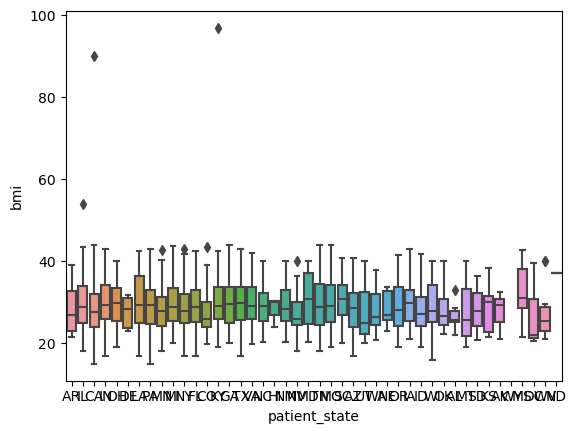

In [408]:
# boxplot of the bmi column of the train data set

sns.boxplot(data = train_data, y='bmi', x='patient_state')
#train_data.groupby('patient_state')['bmi'].mean()

In [296]:
mean_bmi = train_data['bmi'].mean()
mean_bmi 

29.16880789858606

In [297]:
train_data['bmi'] = train_data['bmi'].fillna(mean_bmi)

In [298]:
train_data['bmi'].isnull().sum()

0

In [106]:
print(CAT_COLS)
print('Length of categorical columns :', len(CAT_COLS))

['patient_race', 'payer_type', 'patient_state', 'Region', 'Division', 'patient_gender', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']
Length of categorical columns : 11


In [115]:
null_values_CAT = train_data[CAT_COLS].isnull().sum()

for i, col in enumerate(null_values_CAT):
    print(f'{CAT_COLS[i]}: {col}')

patient_race: 6657
payer_type: 1765
patient_state: 0
Region: 0
Division: 0
patient_gender: 0
breast_cancer_diagnosis_code: 0
breast_cancer_diagnosis_desc: 0
metastatic_cancer_diagnosis_code: 0
metastatic_first_novel_treatment: 13162
metastatic_first_novel_treatment_type: 13162


In [119]:
null_values_CAT = train_data[CAT_COLS].isnull().sum()
total_rows = len(train_data)

for i, col in enumerate(null_values_CAT):
    percentage_null = (col / total_rows) * 100
    print(f'{CAT_COLS[i]}: {percentage_null:.2f}%')

patient_race: 50.54%
payer_type: 13.40%
patient_state: 0.00%
Region: 0.00%
Division: 0.00%
patient_gender: 0.00%
breast_cancer_diagnosis_code: 0.00%
breast_cancer_diagnosis_desc: 0.00%
metastatic_cancer_diagnosis_code: 0.00%
metastatic_first_novel_treatment: 99.92%
metastatic_first_novel_treatment_type: 99.92%


### Null value count and percentage of the categorical features of train data

- List patient_race: 6657
- List patient_race: 50.54%

- payer_type: 1765
- payer_type: 13.40%

- metastatic_first_novel_treatment: 13162
- metastatic_first_novel_treatment: 99.92%

- metastatic_first_novel_treatment_type: 13162
- metastatic_first_novel_treatment_type: 99.92%

### Data exploration

#### Numeric Fields

In [20]:
def plot_numeric():
    palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
               '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']
    features = test_data.columns
    n_bins = 50
    histplot_hyperparams = {
        'kde':True,
        'alpha':0.4,
        'stat':'percent',
        'bins':n_bins
    }

    columns = NUMERIC_COLS
    n_cols = 3
    n_rows = math.ceil(len(columns)/n_cols)
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
    ax = ax.flatten()

    for i, column in enumerate(columns):
        plot_axes = [ax[i]]
        sns.kdeplot(
            train_data[column], label='Train',
            ax=ax[i], color=palette[0]
        )

        sns.kdeplot(
            test_data[column], label='Test',
            ax=ax[i], color=palette[1]
        )

        # titles
        ax[i].set_title(f'{column} Distribution');
        ax[i].set_xlabel(None)

        # remove axes to show only one at the end
        plot_axes = [ax[i]]
        handles = []
        labels = []
        for plot_ax in plot_axes:
            handles += plot_ax.get_legend_handles_labels()[0]
            labels += plot_ax.get_legend_handles_labels()[1]
            plot_ax.legend().remove()

    for i in range(i+1, len(ax)):
        ax[i].axis('off')

    fig.suptitle(f'Dataset Feature Distributions\n\n\n', ha='center',  fontweight='bold', fontsize=25, y=1.00)
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.00), fontsize=25, ncol=3)
    plt.tight_layout()

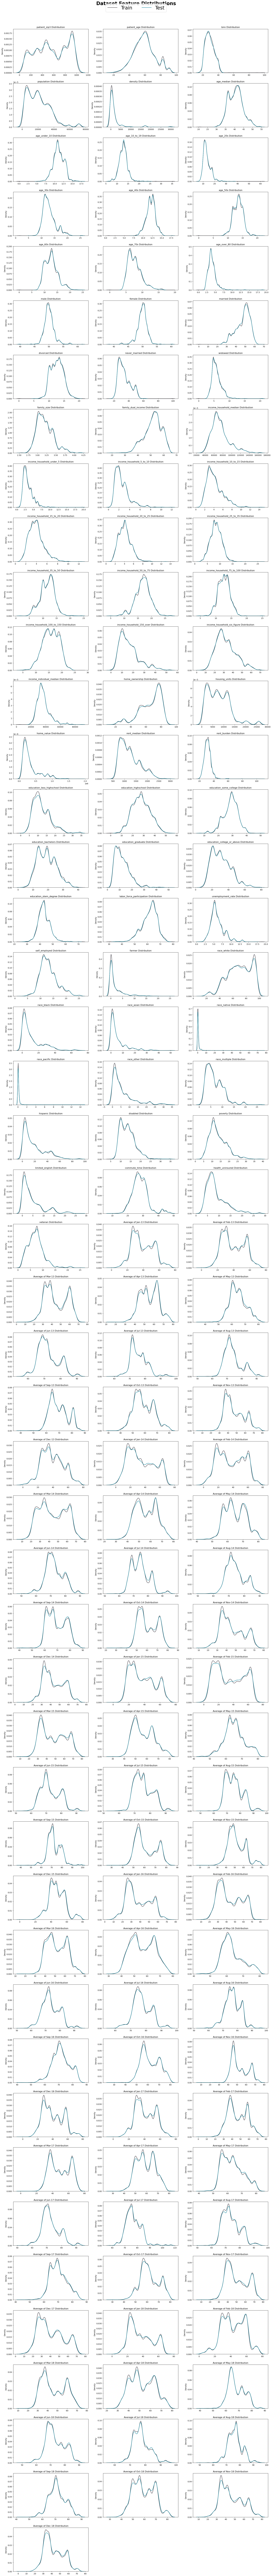

In [21]:
plot_numeric()

#### Categorical Fields

In [73]:
def plot_cat(limit_unique=10):
    selectcols = train_data[CAT_COLS].nunique()<=limit_unique
    cols_ = selectcols[selectcols].index.to_list()
    n_cols = len(cols_)
    fig, ax = plt.subplots(n_cols, 2, figsize=(12, 6 * n_cols))
    for i, coluna in enumerate(cols_):    
        sns.countplot(x=train_data[coluna], ax=ax[i, 0])
        ax[i, 0].set_title(f'{coluna}')
        ax[i, 0].set_ylabel('Count')
        ax[i, 0].set_xlabel(coluna)
        ax[i, 0].tick_params(axis='x', labelrotation=45)

        for container in ax[i, 0].containers:
            ax[i, 0].bar_label(container, fmt='%d', label_type='center')

        s1 = train_data[coluna].value_counts()        

        textprops = {
            'size':8, 
            'weight': 'bold', 
            'color':'white'
        }

        ax[i, 1].pie(s1,
            autopct='%1.f%%',
            pctdistance=0.8, 
            textprops=textprops,
            labels=train_data[coluna].value_counts().index
        )    
        ax[i, 1].set_title(f'% {coluna}')

    plt.tight_layout()
    plt.show()
    # ax = sns.countplot(x=train['patient_race'])
    # for container in ax.containers:
    #     ax.bar_label(container, fmt='%d', label_type='center')

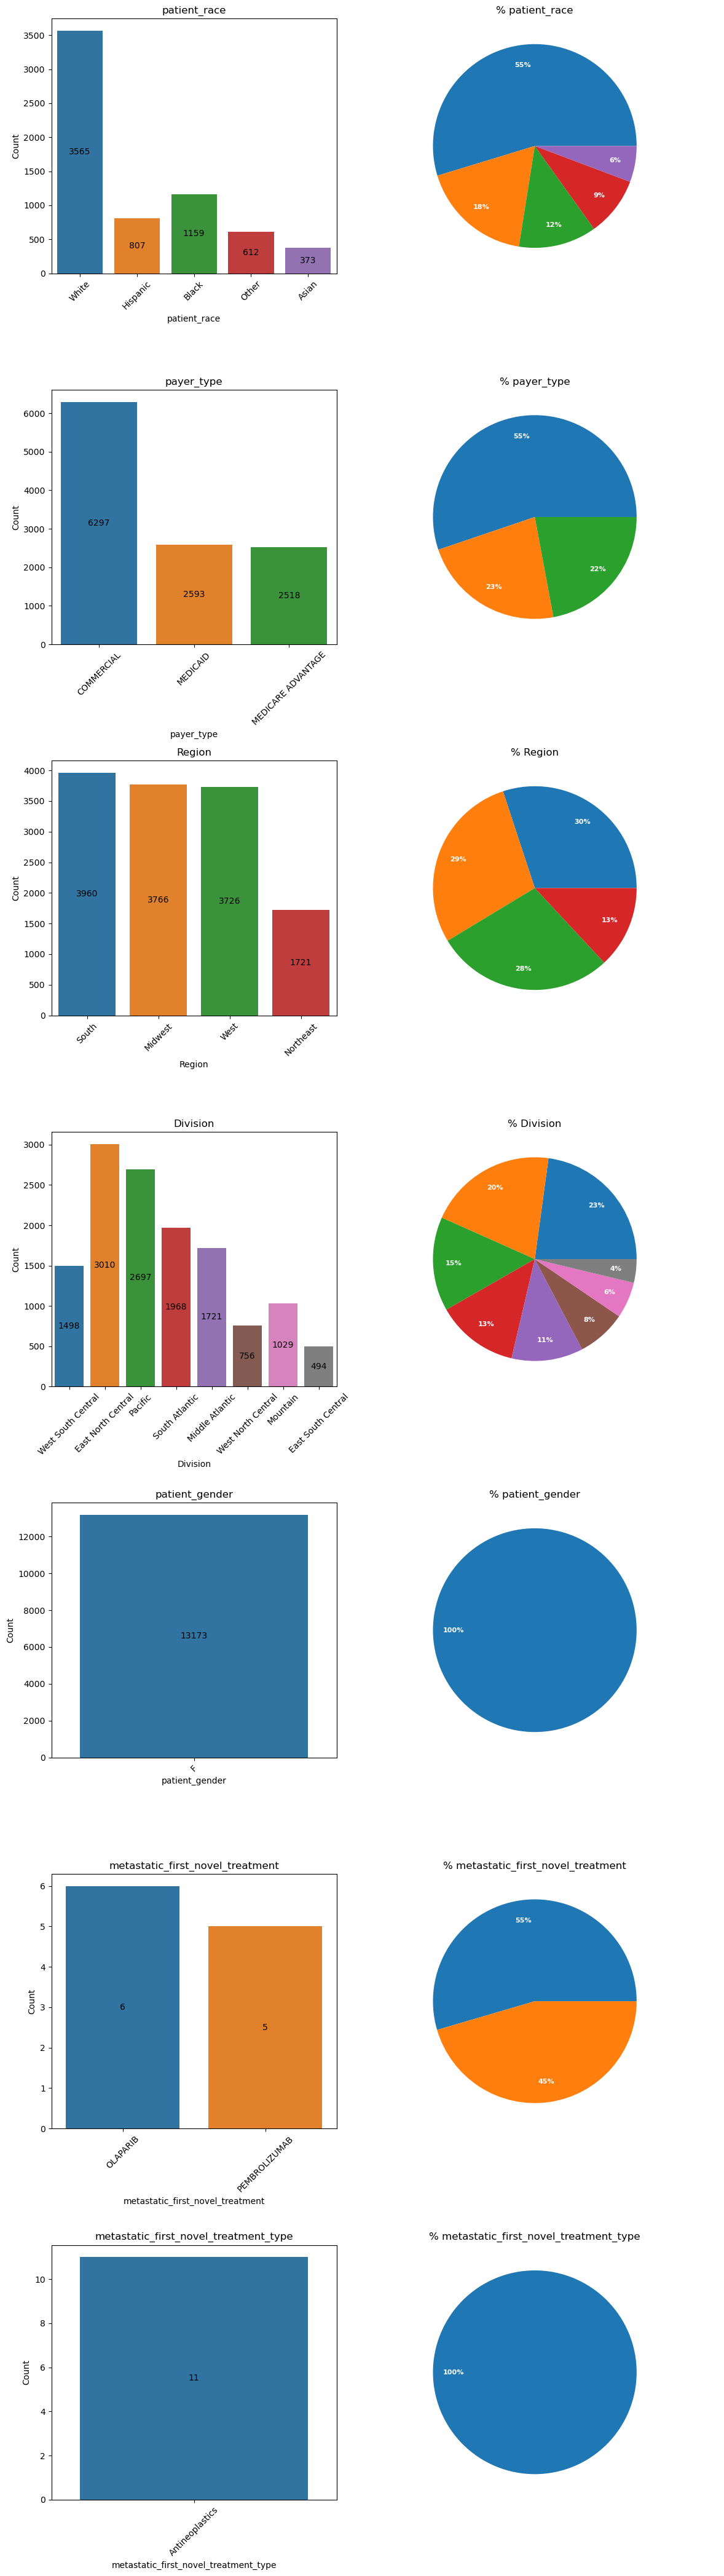

In [74]:
plot_cat()

In [63]:
# Check for values in train that are not in test
for column in CAT_COLS:
    unique_values_train = train_data[column].unique()
    unique_values_test = test_data[column].unique()
    unique_values_only_in_train = unique_values_train[~pd.Series(unique_values_train).isin(unique_values_test)]
    
    if unique_values_only_in_train.any():
        print(f'Unique values in {column} in train but not in test:')
        print(unique_values_only_in_train)

# Check for values in test that are not in train
for column in CAT_COLS:
    unique_values_train = train_data[column].unique()
    unique_values_test = test_data[column].unique()
    unique_values_only_in_test = unique_values_test[~pd.Series(unique_values_test).isin(unique_values_train)]
    
    if unique_values_only_in_test.any():
        print(f'Unique values in {Fore.GREEN}{column}{Fore.BLACK} in test but not in train:')
        print(unique_values_only_in_test)

Unique values in breast_cancer_diagnosis_code in train but not in test:
['C50421' 'C50922' 'C5001' 'C50221' 'C509' 'C50122' 'C50619']
Unique values in breast_cancer_diagnosis_desc in train but not in test:
['Malig neoplasm of upper-outer quadrant of right male breast'
 'Malignant neoplasm of unspecified site of left male breast'
 'Malignant neoplasm of nipple and areola, female'
 'Malig neoplasm of upper-inner quadrant of right male breast'
 'Malignant neoplasm of breast of unspecified site'
 'Malignant neoplasm of central portion of left male breast'
 'Malignant neoplasm of axillary tail of unsp female breast']
Unique values in metastatic_cancer_diagnosis_code in train but not in test:
['C7971' 'C7901' 'C7962' 'C7880' 'C7972' 'C795' 'C7900']
Unique values in breast_cancer_diagnosis_code in test but not in train:
['C5021']
Unique values in breast_cancer_diagnosis_desc in test but not in train:
['Malignant neoplasm of upper-inner quadrant of breast, female']
Unique values in metastatic_

In [427]:
patient_zip3_code =train_data['patient_zip3'].unique()
print('total no of unique values : ' ,len(patient_zip3_code))
print('total no of row : ' ,len(train_data['patient_zip3']))

total no of unique values :  751
total no of row :  13173


# Data Preprocessing


We will perform the following data preprocessing steps :

- List Impute null values
- List Impute rare values
- List Drop columns with a high % of null values

In [66]:
COLS_LOW_OCCURRENCE = ['metastatic_cancer_diagnosis_code',
                       'breast_cancer_diagnosis_desc', 
                       'breast_cancer_diagnosis_code']
class BaseEstimator, TransformerMixin:
    def __init__(self, columns=None, threshold=3):
        self.columns = columns
        self.threshold = threshold

    def fit(self, X, y=None):
        self.low_occurrence_values_ = {}
        for col in self.columns:
            self.low_occurrence_values_[col] = (X[col].value_counts() <= self.threshold)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            low_occurrence_values_col = self.low_occurrence_values_[col]
            X_copy.loc[X_copy[col].isin(low_occurrence_values_col[low_occurrence_values_col].index), col] = 'Other Code'
        return X_copy

SyntaxError: invalid syntax (1812851390.py, line 4)